In [1]:
import numpy as np
import ellc
import matplotlib.pyplot as plt

In [2]:
import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np

In [15]:
t,y,yerr = np.loadtxt('data/HD23642.dat.txt', usecols=(0,1,2)).T

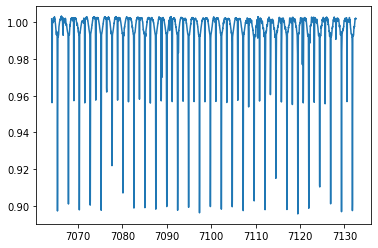

In [16]:

y = -y + 1
plt.plot(t,y)

In [17]:
def model(params, x):
    r1, r2, incl, sbratio, f_c, f_s, q, t0, period = params
    lc = ellc.lc(x,t_zero=t0, q=q,period=period,
            radius_1=r1, radius_2=r2,
             incl=incl,
             sbratio=sbratio,f_c=f_c, f_s=f_s)
    return lc


def lnprior(params):
    r1, r2, incl, sbratio, f_c, f_s, q, t0 = params
    if (75 < incl < 95) & (q < 5.):
        return 0.
    else:
        return -np.inf
    
def lnlike(params, x, y, yerr):
    lp = lnprior(params)
    if not np.isfinite(lp):
        return -np.inf
    try:
        model_flux = model(params, x)
        return -0.5 * np.sum((y - model_flux)**2 / yerr**2)
    except:
        return -np.inf
    
from scipy.optimize import minimize
nll = lambda *args: -lnlike(*args)

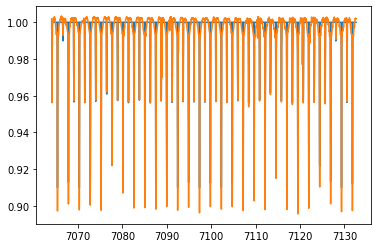

In [19]:
params = [0.1450, 0.1262, 78.21, 0.4859, 0., 0., 0.707, 7119.52217, 2.4611357]
aa = model(params, t)
plt.plot(t, aa)
plt.plot(t,y)